# Create an index of several variables

If you have several variables that measure the same thing, it might be appropriate to make an *index variable*. It is a more comprehensive variable that measures for instance an added score, or an average of the different variables. One advantage of index variables is that measurement error in the constituent variables cancel out, and you get a better measure of the underlying concept that you are really interested in.

Let's say we want to measure a persons knowledge of basic scientific facts. There is no single questions that could capture everything. If we for instance ask "What is smallest, the elctron or the atom?" (it is the electron!) it is of course likely that more knowledgeable persons will know the answer more often. But even a person that generally is ignorant of science might have heard this particular fact, and someone that knows a lot might have missed it. By adding together several questions and combine the answers we can get a more comprehensive picture of how much the person knows.

In this guide we will cover how to make two simple indices over basic scientific knowledge, and how to check the reliability of the index, that is, how well the constituent variables correlate.

## Step 1: Recode the variables that will make up the index

We will use the american [General Social Survey](https://gss.norc.org/), which asks several questions about basic scientific facts. We start by loading the data:

In [4]:
use "data/GSS2018.dta", clear

First we need to [`recode`](recodings_en.html) the variables so that they have a common scale. If we for instance would add a variable that ranges from 1-4 with a variable that has the scale 1-10 we would have problems. The 1-10 variable would carry a lot more "weight" in the index.

We will use five questions. 1) What is smaller, the electorn or the atom? 2) Does the earth move around the sun, or the sun around the earth? 3) Have the continents moved over time? 4) Does antibiotics kill virus as well as bacteria? 5) Does a laser work by focusing sound waves?

The variables are generally coded so that 1 means "true" and 2 "false". We are however only interested in whether the answer is correct or not, and therefore construct a new set of variables that have the value 0 if the respondent answered incorrectly, and 1 if he or she answered correctly. We do this with the `recode` command. The new variables are called "c_" and then a brief summary of what the question is about.

In [5]:
recode electron (1 = 1) (2=0), gen(c_electron)
recode earthsun (1 = 1) (2=0), gen(c_earthsun)
recode condrift (1 = 1) (2=0), gen(c_condrift)
recode viruses (1 = 0) (2=1), gen(c_viruses)
recode lasers (1 = 0) (2=1), gen(c_lasers)


(293 differences between electron and c_electron)

(281 differences between earthsun and c_earthsun)

(140 differences between condrift and c_condrift)

(1109 differences between viruses and c_viruses)

(777 differences between lasers and c_lasers)


We can first look at the averiages of the new variables, to see how many answered correctly. We can do that with the `sum` command. If we write `sum c_*` the command is run on all variables that start with "c_".

In [7]:
sum c_*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  c_electron |        837    .6499403    .4772736          0          1
  c_earthsun |      1,117    .7484333    .4341078          0          1
  c_condrift |      1,063    .8682973    .3383265          0          1
   c_viruses |      1,109    .5383228    .4987541          0          1
    c_lasers |        777    .6718147    .4698551          0          1


Since the variables only have the values 0 or 1, a mean value of 0.5 means that 50 percent answered correctly. The hardest question was apparently whether antibiotics kill virus (it does not), where 54 percent had the right answer. The easiest question was about continental drift. 87 percent knew the answer here. Now that we have a good set of similar variables we can create the index.

## Step 2a: Combine the variables to an additive index
The first index we will create is the simplest possible: A combined score of the variables. A person that answers incorrectly on all questions get 0 points. A person that has all right answers gets 5 points. We construct the index with the `generate` command (abbreviated `gen`). The result is a new variable. We then [produce a `histogram`](histogram_en.html) to see the distribution of scores.


(1,783 missing values generated)

(bin=23, start=0, width=.2173913)


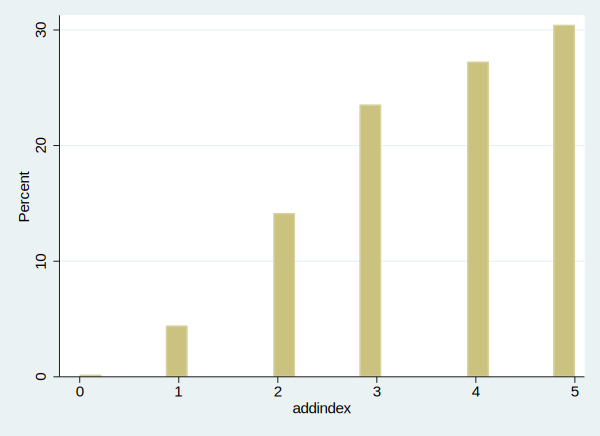

In [12]:
gen addindex = c_electron + c_earthsun + c_condrift + c_viruses + c_lasers
histogram addindex, percent

We now have a scale that measures knowledge of basic scientific facts. Only a few people had zero points (if you guess on all questions you should on average get 2.5 points). About 30 percent answered correctly on all questions.

The scale ranges from 0 to 5. If we instead want it to range from 0 to 1, to show the proportion of questions the respondent knew, we cna simply divide the variable by 5. The code would then have looked like below. However, it does not change anything substantially. The ranking of the respondents would have looked exactly the same.

In [13]:
gen addindex_01 = (c_electron + c_earthsun + c_condrift + c_viruses + c_lasers)/5

(1,783 missing values generated)


## Step 2b: Calculate the mean of the variables
A limitation of the method is that only persons that have valid answers on all the questions are included in the index. A person that has a missing value on a single variable is excluded. Therefore there are only 565 persons that have a value on the new index, despite there being 777 responses on the least answered question.

An alternative approach is therefore to take the average of all the variables that the respondent has values on. The upside is that we get more observations on the index, the downside is that the index means slightly different things for different people. To only answer one question and be right is not the same thing as answering five questions correctly. It is therefore important to think this through. What is more important, wide coverage, or fair comparisons between respondents?

To create the index this way we use the command `egen` - am extend version of `gen` combined with `rowmean()`. Here we simply list the variables we want to take the average of, we dont place plus signs between them. We then create a histogram to see the distribution again:


(1182 missing values generated)

(bin=30, start=0, width=.03333333)


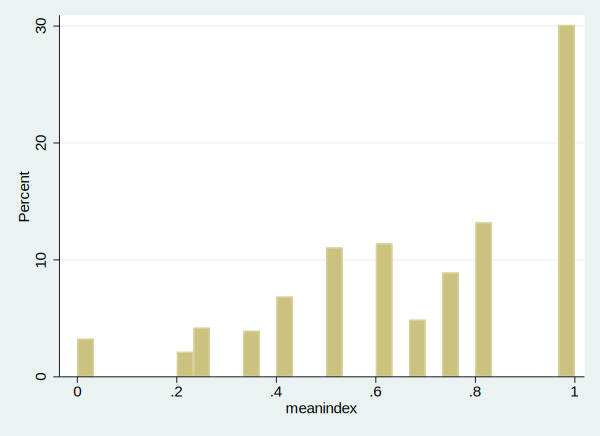

In [20]:
egen meanindex = rowmean(c_electron c_earthsun c_condrift c_viruses c_lasers)
histogram meanindex, percent

There are now many more different values, and the distribution looks different. More people have the value 0, since it now includes people who only answered one or two questions (and wrong). But we also now have 1166 persons with a value on the index.

## Step 3: Check how well the variables in the index correlate
An index can be created for different reasons. In this example the purpose was to see how knowledgeable people are about science. Here it does not matter if the questions "go together", that is, correlate. A persons that answers all questions correctly know more about science than a person who does not. The purpose is to evaluate.

But if we want to measure some underlying attitude, for instance an ideology, it might be important to see whether the questions actually correlate. If they are all indicators of a broader ideology, they should be correlated. Let's say that we had chosen five questions that we thought would capture left/right ideology. If we then find that one of the questions is uncorrelated with the other it might be a good idea to exclude it from the index. It might be picking up something else than the ideology.

We can first look at the [correlations](correlation_en.html) between the variables, in a correlation matrix. We write `pwcorr` followed by the list of variables:

In [22]:
pwcorr c_electron c_earthsun c_condrift c_viruses c_lasers


             | c_elec~n c_eart~n c_cond~t c_viru~s c_lasers
-------------+---------------------------------------------
  c_electron |   1.0000 
  c_earthsun |   0.0615   1.0000 
  c_condrift |   0.0857   0.1299   1.0000 
   c_viruses |   0.0931   0.2131   0.0959   1.0000 
    c_lasers |   0.0989   0.2260   0.0913   0.2096   1.0000 


All the variables have positive correlations. A person that answers one question correctly is more likely to answer another question correctly. But the relationships are quite weak - the correlation between knowing that the electron is smaller than the atom and that the earth revolves around the sun is only 0.06.

### Cronbach's alpha
There are established measures for the reliability of indices, meaning how well the variables in the index correlate. A common measure is [*Cronbach's alpha*](https://en.wikipedia.org/wiki/Cronbach%27s_alpha). It ranges from 0 to 1, and the higher the value, the more the variables in the index tend to correlate. A rule of thumb is that 0.7 indicates that the scale is "reliable" but there is obviously not something magical about that threshold.

We write `alpha` followed by the list of variables:

In [28]:
alpha c_electron c_earthsun c_condrift c_viruses c_lasers


Test scale = mean(unstandardized items)

Average interitem covariance:     .0258188
Number of items in the scale:            5
Scale reliability coefficient:      0.4287


The relevant value is found at the bottom: 0.4287. Not particularly high. In this case it does not matter, since our aim was to evaluate, rather than to find an underlying dimension of scientific knowledge. But if we aimed to find a coherent dimension we would want to remove variables that have low correlations with the other variables. By adding the option `, item` we can to the right in the table see what the alpha would be, if we removed a particular variable.

In [31]:
alpha c_electron c_earthsun c_condrift c_viruses c_lasers, item


Test scale = mean(unstandardized items)

                                                            average
                             item-test     item-rest       interitem
Item         |  Obs  Sign   correlation   correlation     covariance      alpha
-------------+-----------------------------------------------------------------
c_electron   |  837    +       0.5380        0.1255        .0308565      0.4341
c_earthsun   | 1117    +       0.6237        0.2508        .0222774      0.3331
c_condrift   | 1063    +       0.4608        0.1539        .0332459      0.4146
c_viruses    | 1109    +       0.6498        0.2295        .0203376      0.3334
c_lasers     |  777    +       0.6270        0.2721        .0222191      0.3415
-------------+-----------------------------------------------------------------
Test scale   |                                             .0258188      0.4287
-------------------------------------------------------------------------------


We could see in the correlation matrix that the question about electrons was only weakly correlated with the other variables. If we remove it, the alpha value would increase slightly, to 0.4341. If we instead removed the question about the movement of the earth around the sun, which had high correlations with the other variables, the alpha value would drop to 0.33.

## The index correlates better with other variables than single variables
To show the benefit of the index we can look at the relationship between education and the indices we created, as well as with the variables on their own. "addindex" is the index that only included people that had answered all questions, and "meanindex" is the mean of the answered questinos. "educ" is a measure of how many years of schooling the respondent has.

In [34]:
pwcorr educ addindex meanindex c_electron c_earthsun c_condrift c_viruses c_lasers


             |     educ addindex meanin~x c_elec~n c_eart~n c_cond~t c_viru~s
-------------+---------------------------------------------------------------
        educ |   1.0000 
    addindex |   0.3656   1.0000 
   meanindex |   0.3592   1.0000   1.0000 
  c_electron |   0.1824   0.5435   0.5380   1.0000 
  c_earthsun |   0.2058   0.5611   0.6237   0.0615   1.0000 
  c_condrift |   0.1209   0.4210   0.4608   0.0857   0.1299   1.0000 
   c_viruses |   0.3431   0.6167   0.6498   0.0931   0.2131   0.0959   1.0000 
    c_lasers |   0.1722   0.5916   0.6270   0.0989   0.2260   0.0913   0.2096 

             | c_lasers
-------------+---------
    c_lasers |   1.0000 


What is interesting is that "educ" has higher correlations with both versions of the index than with any single variable that is used to create the indices. By combining the different variables we get a better indicator of much you know about science - something we can reasonably expect to be improved by education.

## Conclusion
We have here talked about how to create additive indices, when the variables are combined by adding them together (or calculating the mean). But index can of course be created in different ways, using more advanced methods. The important thing is that it is the research question that guides the coding of the variables.